In [1]:

import matplotlib.pyplot as plt
import pandas as pd 

# Modules from Modelflow
from modelclass import model 

#Optional functionalities 
model.widescreen();
model.scroll_off();

In [2]:
tvaluta= '''
list valuta1 = ISO  : USD JPY EUR $


frml <matrix> msigma  = matrix( [[0.01573635,0.01436816,	0.01045556],
                                 [0.01436816,0.02289016,	0.01172995],
                                 [0.01045556,0.01172995,	0.01748076]]  ) $

frml <matrix> vreturn         = matrix([0.048,0.040,0.035]) $

frml <matrix> max_w             = to_matrix(valuta1,max_{iso})      $
frml <matrix> min_w             = to_matrix(valuta1,min_{iso})       $


frml <matrix> risk_weights      = to_matrix(valuta1,risk_weight_{iso}) $
frml <matrix> leverage_weights  = to_matrix(valuta1,leverage_weight_{iso}) $
frml <matrix> lcr_weights       = to_matrix(valuta1,lcr_weight_{iso}) $
FRML <matrix> positions          =  mv_opt(msigma,vreturn,riskaversion, total,
                      [[risk_weights] , [-lcr_weights] , [leverage_weights]],
                                       [capital, -lcr , equity] ,min_w,max_w) $
frml  xx      risk               =  (positions.trans() * msigma * positions)[0,0]$
frml  xx      return             =  (positions.trans() * vreturn        )[0,0] $
frml  xx      risk_weighted_sum     = (risk_weights.trans() * positions)[0,0] $
frml  xx      lcr_weighted_sum      = (lcr_weights.trans() * positions)[0,0] $
frml  xx      leverage_weighted_sum = (leverage_weights.trans() * positions)[0,0] $
frml  xx      argexpand(valuta1,position_{iso}) = positions $
'''

In [3]:
mvaluta = model.from_eq(tvaluta)

In [4]:
print(mvaluta.equations)

LIST VALUTA1 = ISO  : USD JPY EUR $
FRML <MATRIX> MSIGMA  = MATRIX( [[0.01573635,0.01436816,	0.01045556],
                                 [0.01436816,0.02289016,	0.01172995],
                                 [0.01045556,0.01172995,	0.01748076]]  ) $
FRML <MATRIX> VRETURN         = MATRIX([0.048,0.040,0.035]) $
FRML <MATRIX> MAX_W             = MATRIX(
[MAX_USD,MAX_JPY,MAX_EUR])      $
FRML <MATRIX> MIN_W             = MATRIX(
[MIN_USD,MIN_JPY,MIN_EUR])       $
FRML <MATRIX> RISK_WEIGHTS      = MATRIX(
[RISK_WEIGHT_USD,RISK_WEIGHT_JPY,RISK_WEIGHT_EUR]) $
FRML <MATRIX> LEVERAGE_WEIGHTS  = MATRIX(
[LEVERAGE_WEIGHT_USD,LEVERAGE_WEIGHT_JPY,LEVERAGE_WEIGHT_EUR]) $
FRML <MATRIX> LCR_WEIGHTS       = MATRIX(
[LCR_WEIGHT_USD,LCR_WEIGHT_JPY,LCR_WEIGHT_EUR]) $
FRML <MATRIX> POSITIONS          =  MV_OPT(MSIGMA,VRETURN,RISKAVERSION, TOTAL,
                      [[RISK_WEIGHTS] , [-LCR_WEIGHTS] , [LEVERAGE_WEIGHTS]],
                                       [CAPITAL, -LCR , EQUITY] ,MIN_W,MAX_W) $
FRM

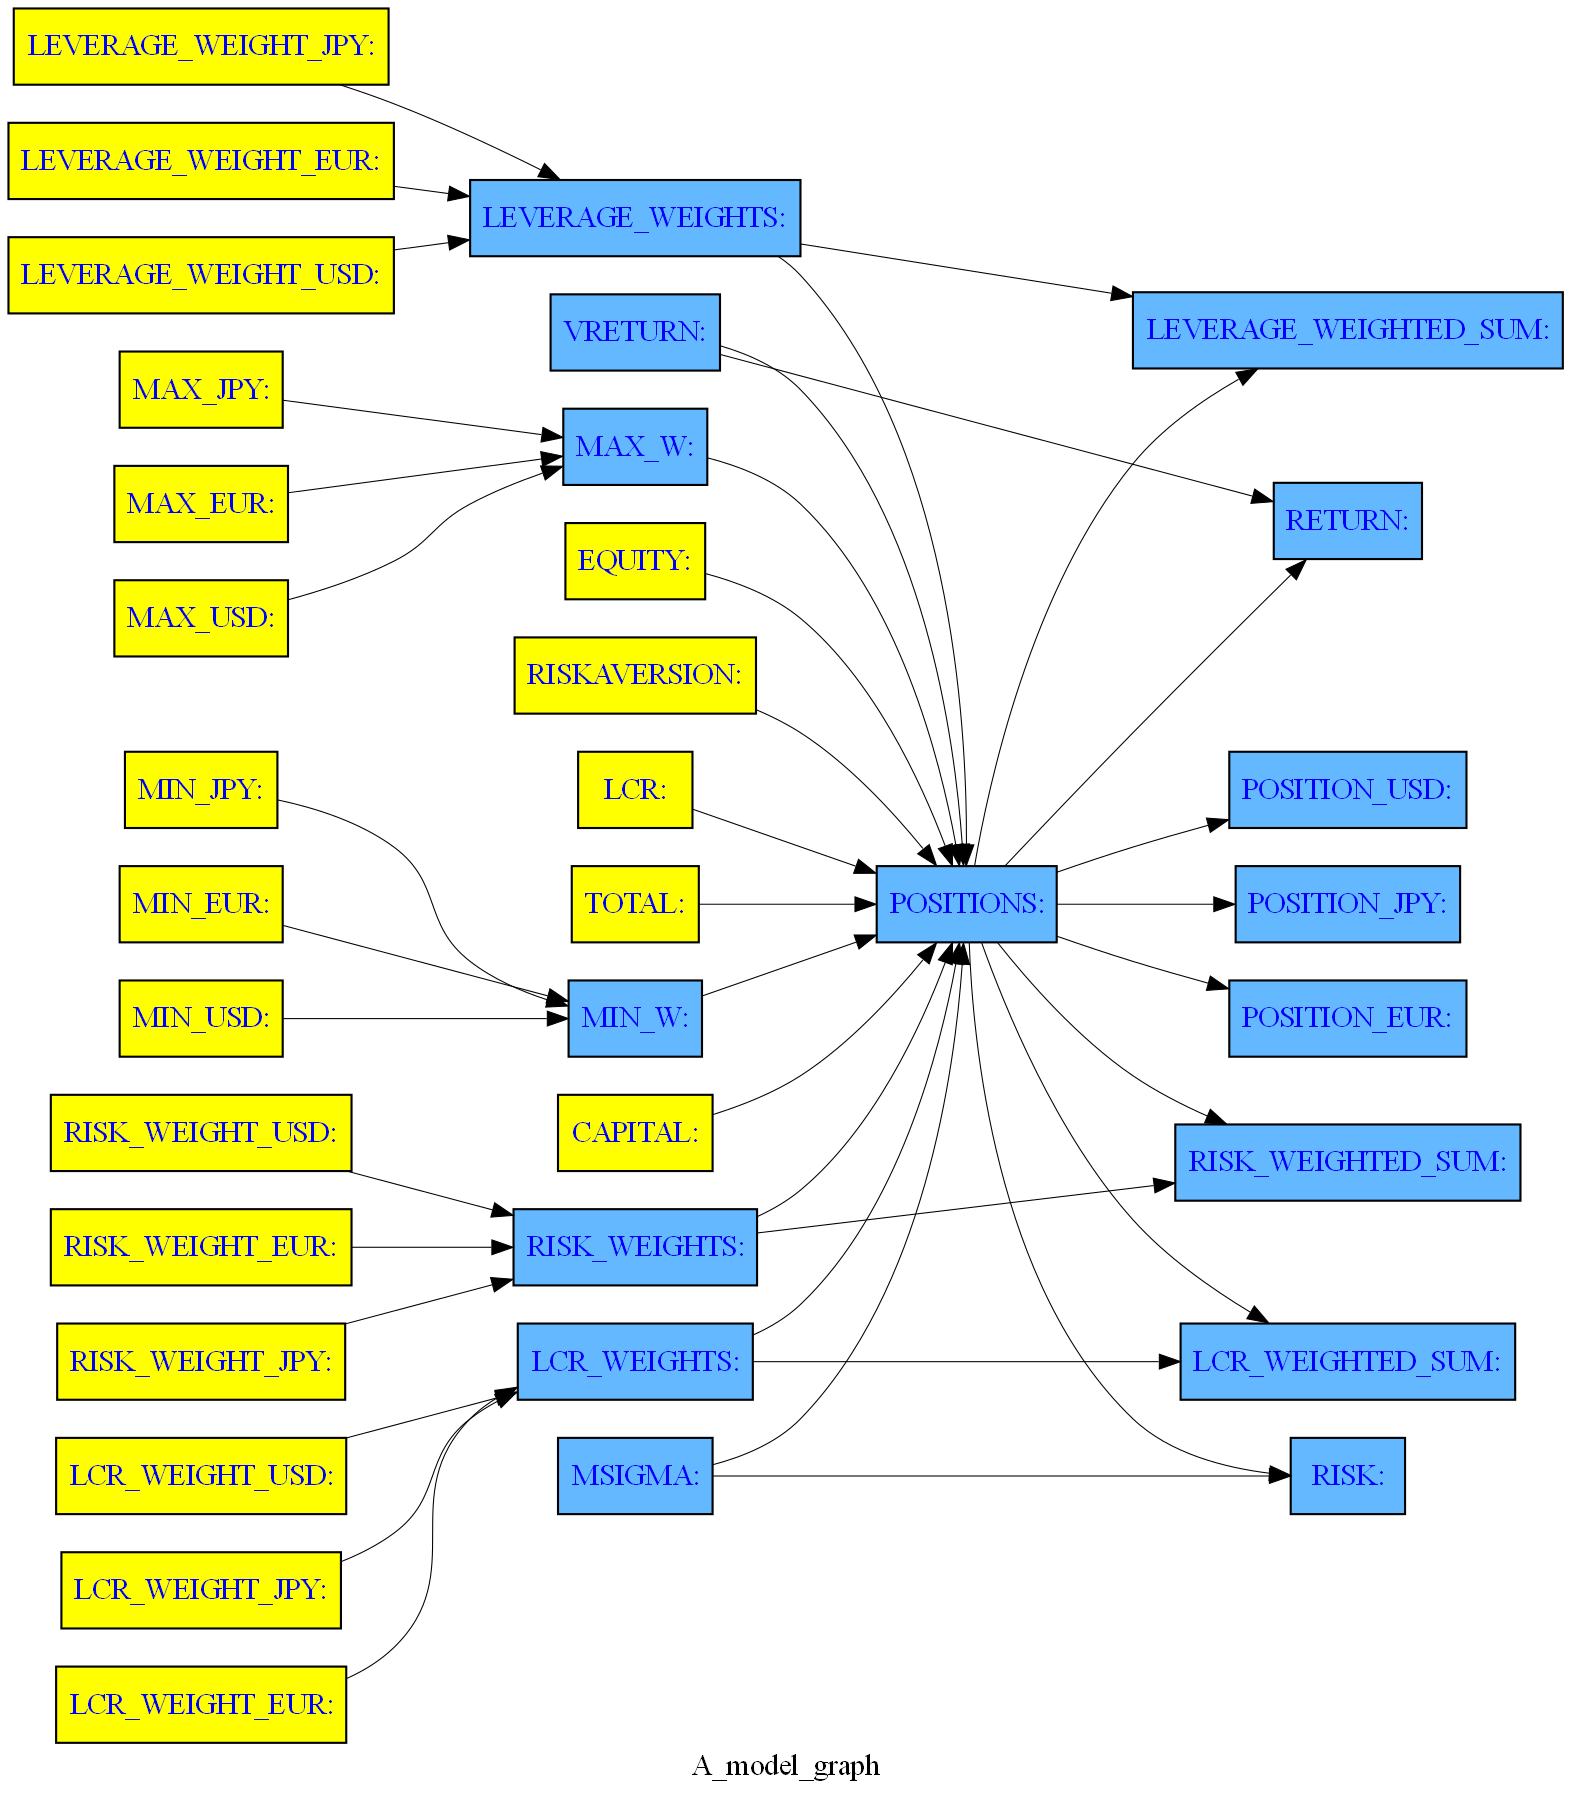

In [5]:
mvaluta.drawmodel(png=1)

In [6]:
mvaluta.istopo

True

In [7]:
experiments  = [i  for i in range(500)]                     # make some experiments 
riskaversion = [e/len(experiments) for e in experiments]    # set the risk aversion in each experiment 
temp         = pd.DataFrame(riskaversion,index=experiments,columns=['RISKAVERSION'])  # stuff it into a dataframe
df    = mvaluta.insertModelVar(temp).pipe(lambda df_: df_[sorted([c for c in df_.columns])]) # fill the dataframe

In [8]:
df.TOTAL     = 10.0

df.MAX_USD   = 90
df.MAX_JPY   = 90
df.MAX_EUR   = 0.   # eur forced to be a liability 

df.MIN_USD   = 0
df.MIN_JPY   = 0
df.MIN_EUR   = -50
df.CAPITAL = 100
df.RISK_WEIGHT_USD = 1
df.RISK_WEIGHT_JPY = 0.5
df.RISK_WEIGHT_EUR = 0.0

df.EQUITY  = 8.
df.LEVERAGE_WEIGHT_USD = 0.5
df.LEVERAGE_WEIGHT_JPY = 0.5
df.LEVERAGE_WEIGHT_EUR = 0.0

df.LCR     = 2
df.LCR_WEIGHT_USD = 0.5
df.LCR_WEIGHT_JPY = 0.1
df.LCR_WEIGHT_EUR = 0.0

In [9]:
results = mvaluta(df,start = 0,slut = len(experiments), silent = True )  # Run the model 

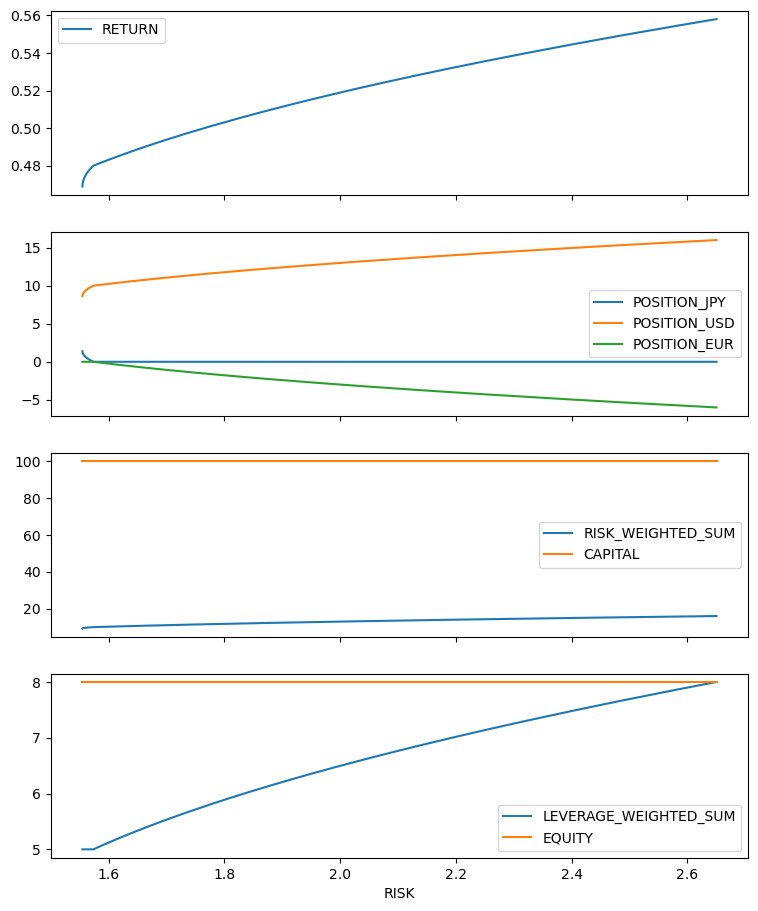

In [10]:
results.RISK = results.RISK.astype('float')
def pplot(vars,ax):
    for v in vars:
        
        _ = results.plot.line(x='RISK',y=v,ax=axes[ax])
        
fig, axes = plt.subplots(nrows=4, ncols=1,  sharex=True,figsize=(9, 11))
pplot(['RETURN'],0)
pplot(['POSITION_JPY','POSITION_USD','POSITION_EUR'],1)
pplot(['RISK_WEIGHTED_SUM','CAPITAL'],2)
pplot(['LEVERAGE_WEIGHTED_SUM','EQUITY'],3)